# ***Minor*** ***Project***

#Project Statement : Car Price Prediction Analysis 

###Project Guide : Dr. Sanjay Goswami 
### Team Leader : Debmalya Halder
### Team Members : Avirup Chowdhury , Subhajit Das , Naishadh Gupta , Ananga Mohon Das 


#About the domian : 
Data science is a field that uses concepts of statistics and programming ,  algorithms and systems to extract knowledge and insights from noisy, structured and unstructured data , insights from data across a broad range of application domains which will further help corporates to gain more business. And there comes the concept of Business Analytics . It is a set of disciplines and technologies for solving business problems using data analysis, statistical models and other quantitative methods. 

###Objective : Data science helps businesses to get insights and trends from collected data and using those insights and analysis, customers can easily get an idea about the ongoing market price and trends. We choose this project because there are few car dealers or brokers who manipulate the market for their own profit and scam the buyers. So our team thought about making a car price prediction analysis to give a clear picture , what are the driving features that can affect the car price and how are those features affecting the price. 


####We choose google collab because it is a cloud platform and the notebook can be accessed by all our team members at the same time. All the necessary libaries were imported, google drive and the dataset was connected to the notebook.  


In [1]:
#importing libaries needed for the project 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import csv 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model
from scipy import stats
%matplotlib inline 

In [2]:
!pip install -U -q PyDrive
  
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
  
  
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
link = 'https://drive.google.com/file/d/1Z1ll5wZl6VK5ffan12PjK5B0dIIgYWFm/view?usp=sharing'
  
import pandas as pd
  
# to get the id part of the file
id = link.split("/")[-2]
  
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('CarPriceDataset_Final.csv')  
  
df = pd.read_csv('CarPriceDataset_Final.csv')
print(df)

      ID      Company     Model  ... Horsepower (kw)  Year Price (Lakhs)
0      1       Maruti      Alto  ...              32  2010           1.2
1      2       Maruti   Wagon R  ...              46  2011           3.0
2      3       Maruti   Wagon R  ...              46  2018           4.0
3      4       Maruti    Ertiga  ...              73  2012           5.1
4      5       Maruti    Ertiga  ...              73  2012           4.0
..   ...          ...       ...  ...             ...   ...           ...
145  146  Rolls Royce   Phantom  ...             417  2016         189.0
146  147  Rolls Royce     Ghost  ...             430  2019         370.0
147  148  Rolls Royce  Cullinan  ...             430  2016         495.0
148  149  Rolls Royce  Cullinan  ...             430  2015         280.0
149  150  Rolls Royce      Dawn  ...             420  2017         292.0

[150 rows x 13 columns]


In [4]:
# inspecting the first 5 rows of the dataframe
df.head()

,ID,Company,Model,Type,Fuel,Transmission,Engine,Mileage,Kms_driven,Buyers,Horsepower (kw),Year,Price (Lakhs)
0,1,Maruti,Alto,Hatchback,Petrol,Manual,796,19.7,45000,2,32,2010,1.2
1,2,Maruti,Wagon R,Hatchback,Petrol,Manual,998,20.5,40005,2,46,2011,3.0
2,3,Maruti,Wagon R,Hatchback,Petrol,Manual,998,20.5,40005,2,46,2018,4.0
3,4,Maruti,Ertiga,MUV,Petrol,Automatic,1462,18.5,28000,2,73,2012,5.1
4,5,Maruti,Ertiga,MUV,Petrol,Automatic,1462,18.5,40000,2,73,2012,4.0


In [5]:
# getting some information about the dataset
df.describe()

,ID,Engine,Mileage,Kms_driven,Buyers,Horsepower (kw),Year,Price (Lakhs)
count,150.000000,150.000000,147.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,2573.346667,15.870748,36673.753333,2.320000,222.046667,2015.553333,62.030733
std,43.445368,1687.191300,6.884811,19426.665542,0.698224,209.008312,3.398651,98.571347
min,1.000000,0.000000,3.800000,3600.000000,2.000000,27.000000,2005.000000,0.800000
25%,38.250000,1462.000000,10.430000,23721.500000,2.000000,74.000000,2014.000000,4.765000
50%,75.500000,1997.000000,15.000000,36000.000000,2.000000,131.000000,2016.000000,19.980000
75%,112.750000,2998.000000,20.170000,45647.250000,2.000000,314.000000,2018.000000,80.000000
max,150.000000,6749.000000,47.450000,130000.000000,5.000000,985.000000,2021.000000,605.000000


In [6]:
# checking the number of missing values
df.isnull().sum()

ID                 0
Company            0
Model              0
Type               0
Fuel               0
Transmission       0
Engine             0
Mileage            3
Kms_driven         0
Buyers             0
Horsepower (kw)    0
Year               0
Price (Lakhs)      0
dtype: int64

In [7]:
# checking the distribution of categorical data
print(df.Fuel.value_counts())
print(df.Transmission.value_counts())
print(df.Type.value_counts())

Petrol      95
Diesel      46
Eletric      3
Hybride      3
Gas          2
Gasoline     1
Name: Fuel, dtype: int64
Automatic    129
Manual        19
Semi-Auto      2
Name: Transmission, dtype: int64
SUV            58
Sedan          36
Coupe          24
Hatchback      24
MUV             6
Convertible     2
Name: Type, dtype: int64


# Pearson Correlation

The Pearson Correlation measures the linear dependence between two variables X and Y. The resulting coefficient is a value between -1 and 1 inclusive, where:

1: total positive linear correlation,

0: no linear correlation,the two variables most likely do not affect each other 

-1: total negative linear correlation.

P-value: What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention, when the
p-value is < 0.001 we say there is strong evidence that the correlation is significant,

p-value is < 0.05, there is moderate evidence that the correlation is significant,

p-value is < 0.1, there is weak evidence that the correlation is significant,and

p-value is > 0.1, there is no evidence that the correlation is significant.

In [8]:
pearsoncorr = df.corr(method='pearson')
pearsoncorr

,ID,Engine,Mileage,Kms_driven,Buyers,Horsepower (kw),Year,Price (Lakhs)
ID,1.000000,0.579027,-0.459365,-0.108800,0.515503,0.481200,0.366648,0.459620
Engine,0.579027,1.000000,-0.688670,-0.064021,0.543387,0.838818,0.287434,0.774528
Mileage,-0.459365,-0.688670,1.000000,0.167036,-0.324920,-0.546172,-0.233363,-0.426583
Kms_driven,-0.108800,-0.064021,0.167036,1.000000,-0.008538,0.022244,-0.072064,0.010209
Buyers,0.515503,0.543387,-0.324920,-0.008538,1.000000,0.372087,0.185078,0.513689
Horsepower (kw),0.481200,0.838818,-0.546172,0.022244,0.372087,1.000000,0.287582,0.745483
Year,0.366648,0.287434,-0.233363,-0.072064,0.185078,0.287582,1.000000,0.249994
Price (Lakhs),0.459620,0.774528,-0.426583,0.010209,0.513689,0.745483,0.249994,1.000000


## Data Visualization

Data visualization is the graphical representation of information and data. By using visual elements like charts and graphs,  data visualization tools provide an accessible way to see and understand trends  and patterns in data.

Bivariate analysis of quantitative values

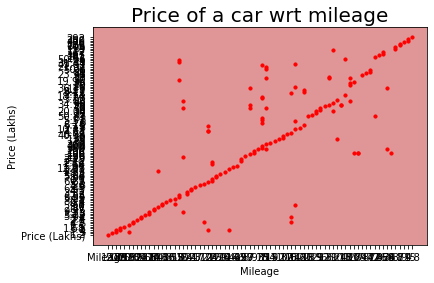

In [9]:
#Plotting a graph establishing the relation of price wrt mileage 
x = []
y= []
  
with open('CarPriceDataset_Final.csv','r') as csvfile:
    lines = csv.reader(csvfile, delimiter=',')
    for row in lines:
        x.append(row[7])
        y.append((row[12]))

ax = plt.axes()  
ax.set_facecolor("#e09696")    
  
plt.scatter(x, y, color = 'r',s = 10)
plt.xlabel('Mileage')
plt.ylabel('Price (Lakhs)')
plt.title('Price of a car wrt mileage', fontsize = 20)
  
plt.show()

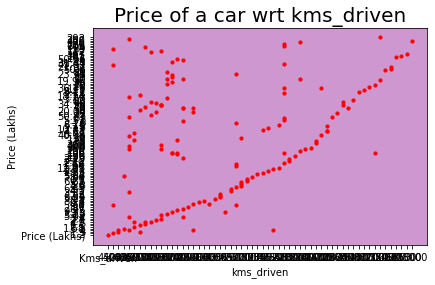

In [10]:
#Plotting a graph establishing the relation of price wrt kms driven 
x = []
y= []
  
with open('CarPriceDataset_Final.csv','r') as csvfile:
    lines = csv.reader(csvfile, delimiter=',')
    for row in lines:
        x.append(row[8])
        y.append((row[12]))

ax = plt.axes()  
ax.set_facecolor("#cf97cf")  
  
plt.scatter(x, y, color = 'r',s = 10)
plt.xlabel('kms_driven')
plt.ylabel('Price (Lakhs)')
plt.title('Price of a car wrt kms_driven', fontsize = 20)
  
plt.show()

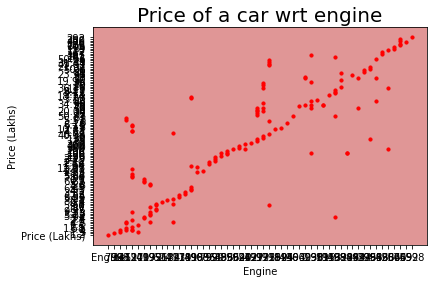

In [11]:
#Plotting a graph establishing the relation of price wrt engine 
x = []
y= []
  
with open('CarPriceDataset_Final.csv','r') as csvfile:
    lines = csv.reader(csvfile, delimiter=',')
    for row in lines:
        x.append(row[6])
        y.append((row[12]))

ax = plt.axes()  
ax.set_facecolor("#e09696")    
  
plt.scatter(x, y, color = 'r',s = 10)
plt.xlabel('Engine')
plt.ylabel('Price (Lakhs)')
plt.title('Price of a car wrt engine', fontsize = 20)
  
plt.show()

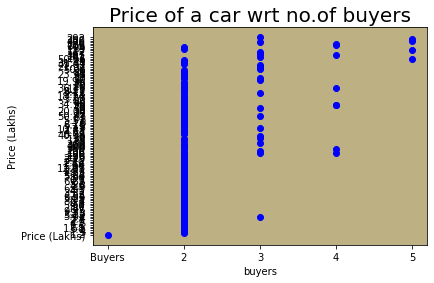

In [12]:
#Plotting a graph establishing the relation of price wrt no of buyers
x = []
y= []
  
with open('CarPriceDataset_Final.csv','r') as csvfile:
    lines = csv.reader(csvfile, delimiter=',')
    for row in lines:
        x.append(row[9])
        y.append((row[12]))

ax = plt.axes()  
ax.set_facecolor("#bdb184")  
  
plt.scatter(x, y, color = 'b')
plt.xlabel('buyers')
plt.ylabel('Price (Lakhs)')
plt.title('Price of a car wrt no.of buyers', fontsize = 20)
  
plt.show()

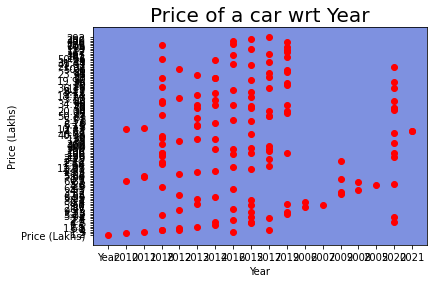

In [13]:
#Plotting a graph establishing the relation of price wrt year 
x = []
y= []
  
with open('CarPriceDataset_Final.csv','r') as csvfile:
    lines = csv.reader(csvfile, delimiter=',')
    for row in lines:
        x.append(row[11])
        y.append((row[12]))

ax = plt.axes()  
ax.set_facecolor("#7e91e0")  
  
plt.scatter(x, y, color = 'r')
plt.xlabel('Year')
plt.ylabel('Price (Lakhs)')
plt.title('Price of a car wrt Year', fontsize = 20)
  
plt.show()

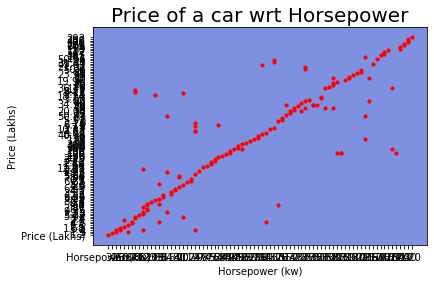

In [14]:
#Plotting a graph establishing the relation of price wrt Horsepower
x = []
y= []
  
with open('CarPriceDataset_Final.csv','r') as csvfile:
    lines = csv.reader(csvfile, delimiter=',')
    for row in lines:
        x.append(row[10])
        y.append((row[12]))

ax = plt.axes()  
ax.set_facecolor("#7e91e0")  
  
plt.scatter(x, y, color = 'r' ,s = 10)
plt.xlabel('Horsepower (kw)')
plt.ylabel('Price (Lakhs)')
plt.title('Price of a car wrt Horsepower', fontsize = 20)
  
plt.show()

Bivariate analysis of qualitative analysis


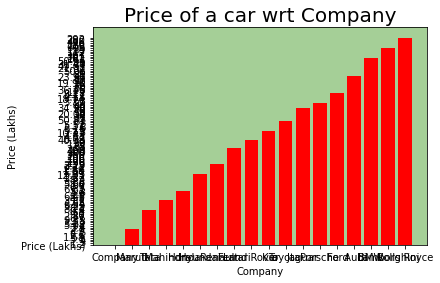

In [15]:
#Plotting a graph establishing the relation of price wrt company
x = []
y= []
  
with open('CarPriceDataset_Final.csv','r') as csvfile:
    lines = csv.reader(csvfile, delimiter=',')
    for row in lines:
        x.append(row[1])
        y.append((row[12]))

ax = plt.axes()  
ax.set_facecolor("#a5cf97")  
  
plt.bar(x, y, color = 'r')
plt.xlabel('Company')
plt.ylabel('Price (Lakhs)')
plt.title('Price of a car wrt Company', fontsize = 20)
  
plt.show()


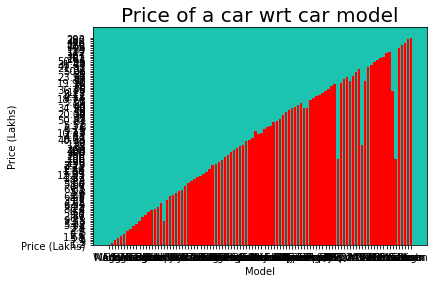

In [16]:
#Plotting a graph establishing the relation of price wrt car model
x = []
y= []
  
with open('CarPriceDataset_Final.csv','r') as csvfile:
    lines = csv.reader(csvfile, delimiter=',')
    for row in lines:
        x.append(row[2])
        y.append((row[12]))

ax = plt.axes()  
ax.set_facecolor("#1CC4AF")      
  
plt.bar(x, y, color = 'r')
plt.xlabel('Model')
plt.ylabel('Price (Lakhs)')
plt.title('Price of a car wrt car model', fontsize = 20)
  
plt.show()

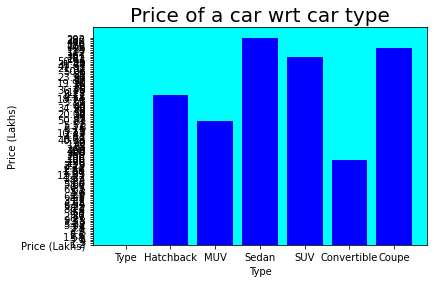

In [17]:
#Plotting a graph establishing the relation of price wrt car type
x = []
y= []
  
with open('CarPriceDataset_Final.csv','r') as csvfile:
    lines = csv.reader(csvfile, delimiter=',')
    for row in lines:
        x.append(row[3])
        y.append((row[12]))

ax = plt.axes()  
ax.set_facecolor("cyan")      
  
plt.bar(x, y, color = 'b')
plt.xlabel('Type')
plt.ylabel('Price (Lakhs)')
plt.title('Price of a car wrt car type', fontsize = 20)
  
plt.show()

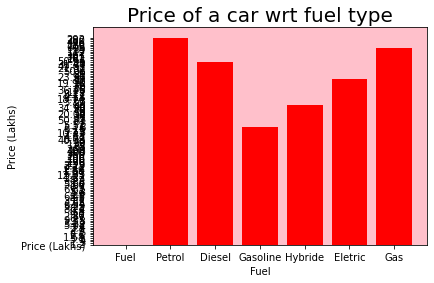

In [18]:
#Plotting a graph establishing the relation of price wrt Fuel type
x = []
y= []
  
with open('CarPriceDataset_Final.csv','r') as csvfile:
    lines = csv.reader(csvfile, delimiter=',')
    for row in lines:
        x.append(row[4])
        y.append((row[12]))

ax = plt.axes()  
ax.set_facecolor("pink")      
  
plt.bar(x, y, color = 'r')
plt.xlabel('Fuel')
plt.ylabel('Price (Lakhs)')
plt.title('Price of a car wrt fuel type', fontsize = 20)
  
plt.show()

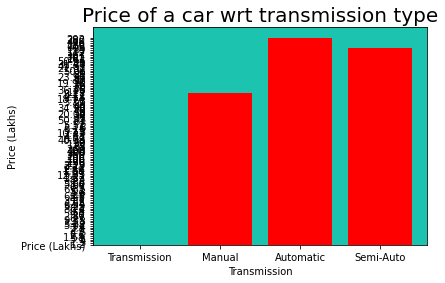

In [19]:
#Plotting a graph establishing the relation of price wrt transmission type
x = []
y= []
  
with open('CarPriceDataset_Final.csv','r') as csvfile:
    lines = csv.reader(csvfile, delimiter=',')
    for row in lines:
        x.append(row[5])
        y.append((row[12]))

ax = plt.axes()  
ax.set_facecolor("#1CC4AF")      
  
plt.bar(x, y, color = 'r')
plt.xlabel('Transmission')
plt.ylabel('Price (Lakhs)')
plt.title('Price of a car wrt transmission type', fontsize = 20)
  
plt.show()

## Data Preparation

Missing values can be handled by deleting the rows and columns having null values. In those scenarios we use drop function and then check the number of rows and columns using shape function. 

In [20]:
df.shape

(150, 13)

In [21]:
# Deleting unwanted datapoints
df.dropna(inplace=True)

In [22]:
# Checking the no.of rows and columns 
df.shape

(147, 13)

In [23]:
# Again deleting unwanted datapoints
df = df.drop(df.index[[79,84,94,95,144,145]])

In [24]:
# Final no.of rows and columns after eliminating unwanted data
df.shape

(141, 13)

In [25]:
# Eliminating unwanted columns
df.drop([ 'ID'] , axis =1 , inplace = True)

In [26]:
# No.of rows and columns after deleting three columns
df.shape


(141, 12)

# Univariate Linear Regression 

Linear regression focuses on determining relationship between one independent variable and one dependent variable. Regression is mainly used when we need to predict any value when there is a positive linear trend.

Calculating the relation between price of a car and its mileage 

In [27]:
#Assigning the predictor variable and target variable 
x = df[['Mileage ']]
y = df[['Price (Lakhs)']]

Case 1 [ 10% test data ]

In [28]:
#splitting the dataset into test and train set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state=2)

In [29]:
#Using the linear regression function the predict the value
clf = LinearRegression()
clf.fit(x_train , y_train)
clf.score(x_test , y_test)

-0.22707955237183142

Case 2 [ 20% test data]

In [30]:
#splitting the dataset into test and train set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=2)

In [31]:
#Using the linear regression function the predict the value
clf = LinearRegression()
clf.fit(x_train , y_train)
clf.score(x_test , y_test)

0.13542634731078562

Case 3 [ 30% test data ]

In [32]:
#splitting the dataset into test and train set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=2)

In [33]:
#Using the linear regression function the predict the value
clf = LinearRegression()
clf.fit(x_train , y_train)
clf.score(x_test , y_test)

0.1388848826666671

Case 4 [40% data]

In [34]:
#splitting the dataset into test and train set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state=2)

In [35]:
#Using the linear regression function the predict the value
clf = LinearRegression()
clf.fit(x_train , y_train)
clf.score(x_test , y_test)

0.17765988780799136

Calculating the relation between price of a car and no.of buyers

In [36]:
#Assigning the predictor variable and target variable 
x = df[['Buyers']]
y = df[['Price (Lakhs)']]

Case 1 [ 10% test data ]


In [37]:
#splitting the dataset into test and train set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state=2)

In [38]:
#Using the linear regression function the predict the value
clf = LinearRegression()
clf.fit(x_train , y_train)
clf.score(x_test , y_test)

-1.389846057894935

Case 2 [ 20% test data]

In [39]:
#splitting the dataset into test and train set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=2)

In [40]:
#Using the linear regression function the predict the value
clf = LinearRegression()
clf.fit(x_train , y_train)
clf.score(x_test , y_test)

-0.45308837193176843

Case 3 [ 30% test data ]

In [41]:
#splitting the dataset into test and train set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=2)

In [42]:
#Using the linear regression function the predict the value
clf = LinearRegression()
clf.fit(x_train , y_train)
clf.score(x_test , y_test)

-0.3462998327450231

Case 4 [40% test data]

In [43]:
#splitting the dataset into test and train set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state=2)

In [44]:
#Using the linear regression function the predict the value
clf = LinearRegression()
clf.fit(x_train , y_train)
clf.score(x_test , y_test)

-0.4502680131961483

Calculating the relation between price of a car and year of production 

In [45]:
#Assigning the predictor variable and target variable 
x = df[['Year']]
y = df[['Price (Lakhs)']]

Case 1 [ 10% test data]

In [46]:
#splitting the dataset into test and train set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state=2)

In [47]:
#Using the linear regression function the predict the value
clf = LinearRegression()
clf.fit(x_train , y_train)
clf.score(x_test , y_test)

-1.3402199334521652

Case 2 [ 20% test data]

In [48]:
#splitting the dataset into test and train set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=2)

In [49]:
#Using the linear regression function the predict the value
clf = LinearRegression()
clf.fit(x_train , y_train)
clf.score(x_test , y_test)

-0.04752011613010909

Case 3 [ 30% test data]

In [50]:
#splitting the dataset into test and train set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=2)

In [51]:
#Using the linear regression function the predict the value
clf = LinearRegression()
clf.fit(x_train , y_train)
clf.score(x_test , y_test)

-0.15462609945282146

Case 4 [40% test data]

In [52]:
#splitting the dataset into test and train set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state=2)

In [53]:
#Using the linear regression function the predict the value
clf = LinearRegression()
clf.fit(x_train , y_train)
clf.score(x_test , y_test)

-0.2196045302951113

Calculating the relation between price of a car and kilometers driven

In [54]:
#Assigning the predictor variable and target variable 
x = df[['Kms_driven']]
y = df[['Price (Lakhs)']]

Case 1 [ 10% test data]

In [55]:
#splitting the dataset into test and train set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state=2)

In [56]:
#Using the linear regression function the predict the value
clf = LinearRegression()
clf.fit(x_train , y_train)
clf.score(x_test , y_test)

-1.2543401714330011

Case 2 [ 20% test data]


In [57]:
#splitting the dataset into test and train set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=2)

In [58]:
#Using the linear regression function the predict the value
clf = LinearRegression()
clf.fit(x_train , y_train)
clf.score(x_test , y_test)

-0.05729198164479077

Case 3 [ 30% test data]

In [59]:
#splitting the dataset into test and train set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=2)

In [60]:
#Using the linear regression function the predict the value
clf = LinearRegression()
clf.fit(x_train , y_train)
clf.score(x_test , y_test)

-0.16361913604973233

Case 4 [40% test data]

In [61]:
#splitting the dataset into test and train set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state=2)

In [62]:
#Using the linear regression function the predict the value
clf = LinearRegression()
clf.fit(x_train , y_train)
clf.score(x_test , y_test)

-0.22073857236656935

Calculating the relation between price of a car and Engine

In [63]:
#Assigning the predictor variable and target variable 
x = df[['Engine']]
y = df[['Price (Lakhs)']]

Case 1 [ 10% test data]

In [64]:
#splitting the dataset into test and train set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state=2)

In [65]:
#Using the linear regression function the predict the value
clf = LinearRegression()
clf.fit(x_train , y_train)
clf.score(x_test , y_test)

0.5423153231352085

Case 2 [ 20% test data]

In [66]:
#splitting the dataset into test and train set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=2)

In [67]:
#Using the linear regression function the predict the value
clf = LinearRegression()
clf.fit(x_train , y_train)
clf.score(x_test , y_test)

0.2337001305417128

Case 3 [ 30% test data]

In [68]:
#splitting the dataset into test and train set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=2)

In [69]:
#Using the linear regression function the predict the value
clf = LinearRegression()
clf.fit(x_train , y_train)
clf.score(x_test , y_test)

0.18132752277297937

Case 4 [40% test data]

In [70]:
#splitting the dataset into test and train set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state=2)

In [71]:
#Using the linear regression function the predict the value
clf = LinearRegression()
clf.fit(x_train , y_train)
clf.score(x_test , y_test)

0.08827776994052916

Calculating the relation between price of a car and Horsepower

In [72]:
#Assigning the predictor variable and target variable 
x = df[['Horsepower (kw)']]
y = df[['Price (Lakhs)']]

Case 1 [ 10% test data]

In [73]:
#splitting the dataset into test and train set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state=2)

In [74]:
#Using the linear regression function the predict the value
clf = LinearRegression()
clf.fit(x_train , y_train)
clf.score(x_test , y_test)

0.4078795826496524

Case 2 [ 20% test data]

In [75]:
#splitting the dataset into test and train set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=2)

In [76]:
#Using the linear regression function the predict the value
clf = LinearRegression()
clf.fit(x_train , y_train)
clf.score(x_test , y_test)

0.6000689635529655

Case 3 [ 30% test data]

In [77]:
#splitting the dataset into test and train set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=2)

In [78]:
#Using the linear regression function the predict the value
clf = LinearRegression()
clf.fit(x_train , y_train)
clf.score(x_test , y_test)

0.6277982239521187

Case 4 [40% test data]

In [79]:
#splitting the dataset into test and train set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state=2)

In [80]:
#Using the linear regression function the predict the value
clf = LinearRegression()
clf.fit(x_train , y_train)
clf.score(x_test , y_test)

0.46367637131670103

####After implementing linear regression using all the four scenarios , we came to a conclusion that taking 30-70 test_train data is the most ideal one for prediction.

##Underfitting and Overfitting model 

A statistical model or a machine learning algorithm is said to have underfitting when it cannot capture the underlying trend of the data. Its occurrence simply means that our model or the algorithm does not fit the data well enough. It usually happens when we have fewer data to build an accurate model.


A statistical model is said to be overfitted when we train it with a lot of data. When a model gets trained with so much data, it starts learning from the noise and inaccurate data entries in our data set.


#Decision tree

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.


Case 1 : Engine

In [81]:
#Assigning the predictor variable and target variable 
x = df[['Engine']]
y = df[['Price (Lakhs)']]

In [82]:
#Split the Dataset into Training and Test Dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [83]:
#Import the Decision Tree Regressor 
from sklearn.tree import DecisionTreeRegressor  
  
#Create a decision tree regressor object  from DecisionTreeRegressor class
DtReg = DecisionTreeRegressor(random_state = 0)  
  
#Fit the decision tree regressor with training data represented by x_train and y_train
DtReg.fit(x_train, y_train)


DecisionTreeRegressor(random_state=0)

In [84]:
#Showing x_train and y_train data
print(x_train, y_train)

     Engine
78     1998
139    5204
68     1493
98     1498
87     1997
..      ...
9      1462
108    2995
67     1998
124    2998
47     1498

[98 rows x 1 columns]      Price (Lakhs)
78           10.00
139         111.00
68            8.09
98            3.17
87           50.00
..             ...
9             5.00
108          75.00
67           40.33
124          32.00
47            5.93

[98 rows x 1 columns]


In [85]:
#Showing x_test and y_test data
print (x_test, y_test)

     Engine
45     1197
60     6262
7      1200
51      999
66     2995
27     1197
71     1197
54     3855
130    1998
8      1462
76     1197
16     1956
132    2993
129    1998
131    1998
103    1499
110    3996
85     1997
33     1199
56     3855
94     2981
22     2184
144    6749
24     1493
2       998
118    2994
26     2179
128    1998
18     1199
10     1197
101    1499
43     1086
105    2995
113    3998
50      999
86     1997
61     6262
112    3998
93     3996
59     3990
44     1197
30     1498
119    2994      Price (Lakhs)
45            4.00
60          400.00
7             3.00
51            3.72
66           90.00
27            3.80
71            4.00
54          120.00
130          31.44
8             6.10
76            5.15
16            9.35
132          50.56
129          49.01
131          23.00
103           4.17
110         100.00
85           30.00
33            4.90
56          106.00
94           88.00
22            8.24
144         605.00
24            8.

In [86]:
#Predicted Price from test dataset w.r.t Decision Tree Regression
y_predict_dtr = DtReg.predict((x_test))


print (y_predict_dtr)


#Model Evaluation using R-Square for Decision Tree Regression
from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict_dtr)
print('R-Square Error associated with Decision Tree Regression is:', r_square)

[  4.29285714 145.           2.5          2.29        63.83
   4.29285714   4.29285714 100.          25.165        5.522
   4.29285714   7.13333333  55.          25.165       25.165
  60.1425      94.25        50.9525       4.548      100.
  55.           5.29       189.           5.93         3.
  55.           5.29        25.165        4.548        4.29285714
  60.1425       2.29        63.83        94.25         2.29
  50.9525     145.          94.25        94.25       350.
   4.29285714   5.47        55.        ]
R-Square Error associated with Decision Tree Regression is: 0.5498105746040209


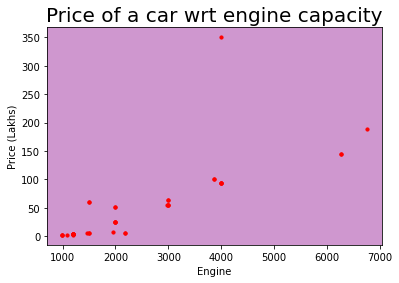

In [87]:
#Plotting a graph establishing the relation of price wrt engine capacity 
x = x_test
y= y_predict_dtr
  
ax = plt.axes()  
ax.set_facecolor("#cf97cf")  
  
plt.scatter(x, y, color = 'r', s = 10)
plt.xlabel('Engine')
plt.ylabel('Price (Lakhs)')
plt.title('Price of a car wrt engine capacity', fontsize = 20)
  
plt.show()

Case 2 : Horsepower


In [88]:
#Assigning the predictor variable and target variable 
x = df[['Horsepower (kw)']]
y = df[['Price (Lakhs)']]

In [89]:
#Split the Dataset into Training and Test Dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [90]:
#Import the Decision Tree Regressor 
from sklearn.tree import DecisionTreeRegressor  
  
#Create a decision tree regressor object  from DecisionTreeRegressor class
DtReg = DecisionTreeRegressor(random_state = 0)  
  
#Fit the decision tree regressor with training data represented by x_train and y_train
DtReg.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [91]:
#Showing x_train and y_train data
print(x_train, y_train)

     Horsepower (kw)
78               115
139              522
68                94
98                82
87               147
..               ...
9                 67
108              220
67               166
124              327
47                97

[98 rows x 1 columns]      Price (Lakhs)
78           10.00
139         111.00
68            8.09
98            3.17
87           50.00
..             ...
9             5.00
108          75.00
67           40.33
124          32.00
47            5.93

[98 rows x 1 columns]


In [92]:
print (x_test)

     Horsepower (kw)
45                62
60               795
7                 60
51                52
66               286
27                84
71                74
54               440
130              132
8                 67
76                63
16               123
132              190
129              212
131              132
103               72
110              383
85               152
33                70
56               454
94               358
22               105
144              417
24                65
2                 46
118              220
26                95
128              166
18                62
10                61
101               70
43                47
105              230
113              375
50                52
86               147
61               795
112              375
93               327
59               985
44                62
30                64
119              220


In [93]:
#Predicted Price from test dataset w.r.t Decision Tree Regression
y_predict_dtr = DtReg.predict((x_test))


print (y_predict_dtr)


#Model Evaluation using R-Square for Decision Tree Regression
from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict_dtr)
print('R-Square Error associated with Decision Tree Regression is:', r_square)

[  3.46       102.           2.5          3.         133.
  37.6          5.412      370.          10.77         5.
   2.29         7.13333333  55.          98.          10.77
   4.79        76.          50.           3.4        100.
  80.          18.74       189.           5.16666667   3.
  67.5          5.29        40.33         3.46         1.58
   3.4          3.          50.          50.5          3.
  50.         102.          50.5         40.86666667 350.
   3.46         4.5         67.5       ]
R-Square Error associated with Decision Tree Regression is: 0.38447343918725185


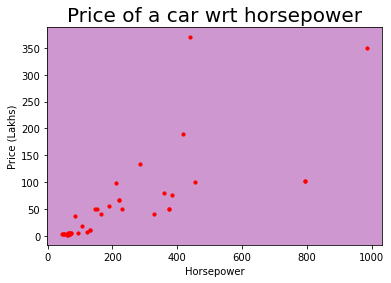

In [94]:
#Plotting a graph establishing the relation of price wrt horsepower
x = x_test
y= y_predict_dtr
  
ax = plt.axes()  
ax.set_facecolor("#cf97cf")  
  
plt.scatter(x, y, color = 'r', s = 10)
plt.xlabel('Horsepower')
plt.ylabel('Price (Lakhs)')
plt.title('Price of a car wrt horsepower', fontsize = 20)
  
plt.show()

Case 3 : Buyers

In [95]:
#Assigning the predictor variable and target variable 
x = df[['Buyers']]
y = df[['Price (Lakhs)']]

In [96]:
#Split the Dataset into Training and Test Dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [97]:
#Import the Decision Tree Regressor 
from sklearn.tree import DecisionTreeRegressor  
  
#Create a decision tree regressor object  from DecisionTreeRegressor class
DtReg = DecisionTreeRegressor(random_state = 0)  
  
#Fit the decision tree regressor with training data represented by x_train and y_train
DtReg.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [98]:
print (x_train , y_train)

     Buyers
78        2
139       4
68        2
98        2
87        2
..      ...
9         2
108       2
67        2
124       3
47        2

[98 rows x 1 columns]      Price (Lakhs)
78           10.00
139         111.00
68            8.09
98            3.17
87           50.00
..             ...
9             5.00
108          75.00
67           40.33
124          32.00
47            5.93

[98 rows x 1 columns]


In [99]:
print (x_test , y_test)

     Buyers
45        2
60        2
7         2
51        2
66        3
27        2
71        2
54        2
130       2
8         2
76        2
16        2
132       5
129       2
131       2
103       2
110       2
85        2
33        2
56        3
94        2
22        2
144       4
24        2
2         2
118       3
26        2
128       3
18        2
10        2
101       3
43        2
105       2
113       2
50        2
86        2
61        2
112       2
93        2
59        2
44        2
30        2
119       3      Price (Lakhs)
45            4.00
60          400.00
7             3.00
51            3.72
66           90.00
27            3.80
71            4.00
54          120.00
130          31.44
8             6.10
76            5.15
16            9.35
132          50.56
129          49.01
131          23.00
103           4.17
110         100.00
85           30.00
33            4.90
56          106.00
94           88.00
22            8.24
144         605.00
24            8.

In [100]:
#Predicted Price from test dataset w.r.t Decision Tree Regression
y_predict_dtr = DtReg.predict((x_test))


print (y_predict_dtr)


#Model Evaluation using R-Square for Decision Tree Regression
from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict_dtr)
print('R-Square Error associated with Decision Tree Regression is:', r_square)

[ 31.65987179  31.65987179  31.65987179  31.65987179 140.76642857
  31.65987179  31.65987179  31.65987179  31.65987179  31.65987179
  31.65987179  31.65987179 122.          31.65987179  31.65987179
  31.65987179  31.65987179  31.65987179  31.65987179 140.76642857
  31.65987179  31.65987179 156.2         31.65987179  31.65987179
 140.76642857  31.65987179 140.76642857  31.65987179  31.65987179
 140.76642857  31.65987179  31.65987179  31.65987179  31.65987179
  31.65987179  31.65987179  31.65987179  31.65987179  31.65987179
  31.65987179  31.65987179 140.76642857]
R-Square Error associated with Decision Tree Regression is: 0.06112448692031136


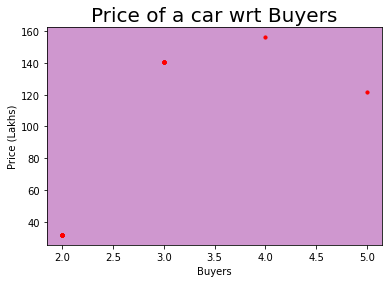

In [101]:
#Plotting a graph establishing the relation of price wrt Buyers 
x = x_test
y= y_predict_dtr
  
ax = plt.axes()  
ax.set_facecolor("#cf97cf")  
  
plt.scatter(x, y, color ='r', s = 10)
plt.xlabel('Buyers')
plt.ylabel('Price (Lakhs)')
plt.title('Price of a car wrt Buyers', fontsize = 20)
  
plt.show()

Case 4 : Kilometers Driven

In [102]:
#Assigning the predictor variable and target variable 
x = df[['Kms_driven']]
y = df[['Price (Lakhs)']]

In [103]:
#Split the Dataset into Training and Test Dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [104]:
#Import the Decision Tree Regressor 
from sklearn.tree import DecisionTreeRegressor  
  
#Create a decision tree regressor object  from DecisionTreeRegressor class
DtReg = DecisionTreeRegressor(random_state = 0)  
  
#Fit the decision tree regressor with training data represented by x_train and y_train
DtReg.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [105]:
print (x_train , y_train)

     Kms_driven
78        39000
139       35000
68        36000
98        30000
87        20000
..          ...
9         15000
108       22000
67        16000
124        3600
47        39000

[98 rows x 1 columns]      Price (Lakhs)
78           10.00
139         111.00
68            8.09
98            3.17
87           50.00
..             ...
9             5.00
108          75.00
67           40.33
124          32.00
47            5.93

[98 rows x 1 columns]


In [106]:
print (x_test , y_test)

     Kms_driven
45        48508
60        60000
7         41000
51        82000
66        40000
27        35550
71        10000
54        32000
130       50000
8         25000
76        15487
16        32000
132       32000
129       35000
131       20000
103       54000
110       22000
85        10000
33        55000
56        38000
94        19000
22         4000
144       35000
24         5000
2         40005
118       20000
26        43000
128       45000
18        48660
10        24530
101       35000
43        35522
105       16000
113       50000
50        82000
86        41000
61        60000
112       50000
93         7000
59        40000
44        48508
30        39522
119       20000      Price (Lakhs)
45            4.00
60          400.00
7             3.00
51            3.72
66           90.00
27            3.80
71            4.00
54          120.00
130          31.44
8             6.10
76            5.15
16            9.35
132          50.56
129          49.01
131        

In [107]:
#Predicted Price from test dataset w.r.t Decision Tree Regression
y_predict_dtr = DtReg.predict((x_test))


print (y_predict_dtr)


#Model Evaluation using R-Square for Decision Tree Regression
from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict_dtr)
print('R-Square Error associated with Decision Tree Regression is:', r_square)

[ 55.6         52.455       10.62         3.605       47.50333333
  10.77        27.35        82.5         55.6         57.33333333
  12.93        82.5         82.5         69.23333333  15.5975
  48.          75.          27.35        48.         220.
  15.5975      41.3         69.23333333  41.3          3.
  15.5975       6.395       42.06666667  55.6         32.49
  69.23333333  10.77        40.33        55.6          3.605
  10.62        52.455       55.6         27.35        47.50333333
  55.6          4.5         15.5975    ]
R-Square Error associated with Decision Tree Regression is: 0.026045402038831766


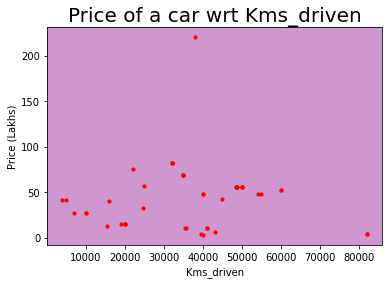

In [108]:
#Plotting a graph establishing the relation of price wrt Kms_driven
x = x_test
y= y_predict_dtr
  
ax = plt.axes()  
ax.set_facecolor("#cf97cf")  
  
plt.scatter(x, y, color ='r', s = 10)
plt.xlabel('Kms_driven')
plt.ylabel('Price (Lakhs)')
plt.title('Price of a car wrt Kms_driven', fontsize = 20)
  
plt.show()

Case 5: Year of Production

In [109]:
#Assigning the predictor variable and target variable 
x = df[['Year']]
y = df[['Price (Lakhs)']]

In [110]:
#Split the Dataset into Training and Test Dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [111]:
#Import the Decision Tree Regressor 
from sklearn.tree import DecisionTreeRegressor  
  
#Create a decision tree regressor object  from DecisionTreeRegressor class
DtReg = DecisionTreeRegressor(random_state = 0)  
  
#Fit the decision tree regressor with training data represented by x_train and y_train
DtReg.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [112]:
print (x_train , y_train)

     Year
78   2015
139  2020
68   2020
98   2012
87   2020
..    ...
9    2015
108  2019
67   2015
124  2020
47   2017

[98 rows x 1 columns]      Price (Lakhs)
78           10.00
139         111.00
68            8.09
98            3.17
87           50.00
..             ...
9             5.00
108          75.00
67           40.33
124          32.00
47            5.93

[98 rows x 1 columns]


In [113]:
print (x_test , y_test)

     Year
45   2018
60   2018
7    2016
51   2017
66   2018
27   2015
71   2017
54   2016
130  2017
8    2015
76   2013
16   2012
132  2018
129  2016
131  2014
103  2015
110  2020
85   2019
33   2005
56   2017
94   2014
22   2015
144  2018
24   2013
2    2018
118  2015
26   2012
128  2015
18   2006
10   2016
101  2014
43   2014
105  2017
113  2015
50   2009
86   2020
61   2016
112  2018
93   2020
59   2017
44   2015
30   2008
119  2018      Price (Lakhs)
45            4.00
60          400.00
7             3.00
51            3.72
66           90.00
27            3.80
71            4.00
54          120.00
130          31.44
8             6.10
76            5.15
16            9.35
132          50.56
129          49.01
131          23.00
103           4.17
110         100.00
85           30.00
33            4.90
56          106.00
94           88.00
22            8.24
144         605.00
24            8.10
2             4.00
118          50.00
26            6.54
128          21.32
18       

In [114]:
#Predicted Price from test dataset w.r.t Decision Tree Regression
y_predict_dtr = DtReg.predict((x_test))


print (y_predict_dtr)


#Model Evaluation using R-Square for Decision Tree Regression
from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict_dtr)
print('R-Square Error associated with Decision Tree Regression is:', r_square)

[ 54.56090909  54.56090909  58.25857143 109.96555556  54.56090909
  69.88777778 109.96555556  58.25857143 109.96555556  69.88777778
  27.89111111  17.42166667  54.56090909  58.25857143  54.24375
  69.88777778  54.14363636  96.74         0.8        109.96555556
  54.24375     69.88777778  54.56090909  27.89111111  54.56090909
  69.88777778  17.42166667  69.88777778   0.8         58.25857143
  54.24375     54.24375    109.96555556  69.88777778   3.90666667
  54.14363636  58.25857143  54.56090909  54.14363636 109.96555556
  69.88777778   5.2         54.56090909]
R-Square Error associated with Decision Tree Regression is: 0.013648697045410718


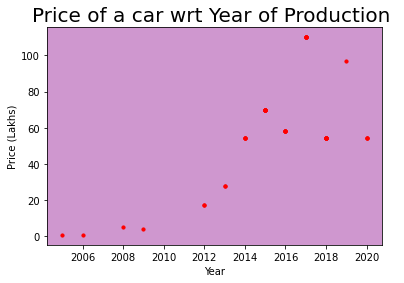

In [115]:
#Plotting a graph establishing the relation of price wrt year of production 
x = x_test
y= y_predict_dtr
  
ax = plt.axes()  
ax.set_facecolor("#cf97cf")  
  
plt.scatter(x, y, color ='r', s = 10)
plt.xlabel('Year')
plt.ylabel('Price (Lakhs)')
plt.title('Price of a car wrt Year of Production ', fontsize = 20)
  
plt.show()

Case 6 : Mileage

In [116]:
#Assigning the predictor variable and target variable 
x = df[['Mileage ']]
y = df[['Price (Lakhs)']]

In [117]:
#Split the Dataset into Training and Test Dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [118]:
#Import the Decision Tree Regressor 
from sklearn.tree import DecisionTreeRegressor  
  
#Create a decision tree regressor object  from DecisionTreeRegressor class
DtReg = DecisionTreeRegressor(random_state = 0)  
  
#Fit the decision tree regressor with training data represented by x_train and y_train
DtReg.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [119]:
print (x_train , y_train)

     Mileage 
78      14.00
139      6.40
68      16.00
98      18.00
87      12.66
..        ...
9       20.04
108     12.00
67      10.60
124     11.00
47      16.50

[98 rows x 1 columns]      Price (Lakhs)
78           10.00
139         111.00
68            8.09
98            3.17
87           50.00
..             ...
9             5.00
108          75.00
67           40.33
124          32.00
47            5.93

[98 rows x 1 columns]


In [120]:
print (x_test , y_test)

     Mileage 
45      25.40
60      11.00
7       20.89
51      19.00
66       9.32
27      20.00
71      21.00
54       9.00
130     15.00
8       20.04
76      22.00
16      17.00
132     13.00
129     14.00
131     15.00
103     22.00
110      8.70
85      13.12
33      23.70
56       8.93
94      10.00
22      16.55
144      6.71
24      16.70
2       20.50
118     11.00
26      15.00
128     18.00
18      20.30
10      19.56
101     16.00
43      20.30
105      9.00
113      8.00
50      19.00
86      12.66
61      11.00
112      8.00
93      20.00
59      18.00
44      25.40
30      24.70
119     11.00      Price (Lakhs)
45            4.00
60          400.00
7             3.00
51            3.72
66           90.00
27            3.80
71            4.00
54          120.00
130          31.44
8             6.10
76            5.15
16            9.35
132          50.56
129          49.01
131          23.00
103           4.17
110         100.00
85           30.00
33            4.90
56  

In [121]:
#Predicted Price from test dataset w.r.t Decision Tree Regression
y_predict_dtr = DtReg.predict((x_test))


print (y_predict_dtr)


#Model Evaluation using R-Square for Decision Tree Regression
from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict_dtr)
print('R-Square Error associated with Decision Tree Regression is:', r_square)

[  3.66        41.3          2.5          4.55       133.
  21.145        5.61        65.          12.625        5.
   8.17         6.7         18.74        18.09666667  12.625
   8.17        76.          65.           3.46       100.
  65.           5.93       189.           4.7          3.
  41.3         12.625       63.35666667   8.2          1.2
   5.49666667   8.2         65.         102.           4.55
  50.          41.3        102.          21.145       63.35666667
   3.66         4.5         41.3       ]
R-Square Error associated with Decision Tree Regression is: 0.3051337479872578


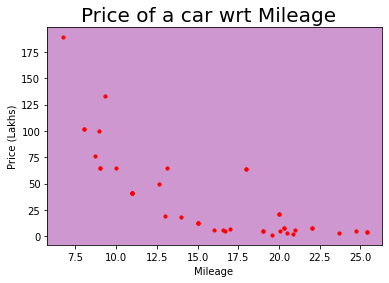

In [122]:
#Plotting a graph establishing the relation of price wrt Mileage 
x = x_test
y= y_predict_dtr
  
ax = plt.axes()  
ax.set_facecolor("#cf97cf")  
  
plt.scatter(x, y, color ='r', s = 10)
plt.xlabel('Mileage ')
plt.ylabel('Price (Lakhs)')
plt.title('Price of a car wrt Mileage  ', fontsize = 20)
  
plt.show()

#3D Plotting

###3d plotting with reference to orginal dataset

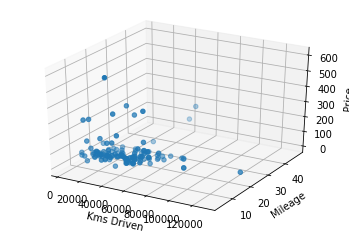

In [123]:
#3d plotting of Kms Driven and Mileage wrt Price
fig = plt.figure()
ax1 = fig.add_subplot(111 , projection = '3d')

x = df[['Kms_driven']]
y = df[['Mileage ']]
z = df[['Price (Lakhs)']]

ax1.scatter (x,y,z)
  
ax1.set_xlabel ('Kms Driven')
ax1.set_ylabel ('Mileage')
ax1.set_zlabel ('Price')
  
plt.show()

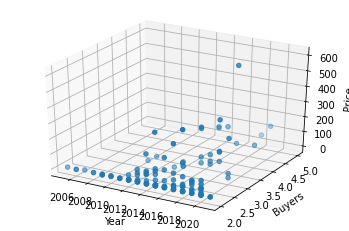

In [124]:
#3d plotting of Year and Buyers wrt Price
fig = plt.figure()
ax1 = fig.add_subplot(111 , projection = '3d')

x = df[['Year']]
y = df[['Buyers']]
z = df[['Price (Lakhs)']]

ax1.scatter (x,y,z)
  
ax1.set_xlabel ('Year')
ax1.set_ylabel ('Buyers')
ax1.set_zlabel ('Price')
  
plt.show()

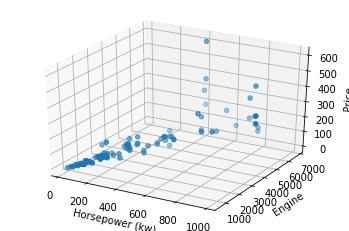

In [125]:
#3d plotting of Horsepower and Engine wrt Price
fig = plt.figure()
ax1 = fig.add_subplot(111 , projection = '3d')

x = df[['Horsepower (kw)']]
y = df[['Engine']]
z = df[['Price (Lakhs)']]

ax1.scatter (x,y,z)
  
ax1.set_xlabel ('Horsepower (kw)')
ax1.set_ylabel ('Engine')
ax1.set_zlabel ('Price')
  
plt.show()

###3d Plotting using test data 

Case 1 : Kms Driven and Mileage

In [126]:
#Assigning the predictor variable and target variable 
x = df[['Kms_driven']]
y = df[['Mileage ']]
z = df[['Price (Lakhs)']]


In [127]:
#splitting the dataset into test and train set
x_train, x_test, z_train, z_test = train_test_split(x, z, test_size = 0.3, random_state=2)
y_train, y_test, z_train, z_test = train_test_split(y, z, test_size = 0.3, random_state=2)

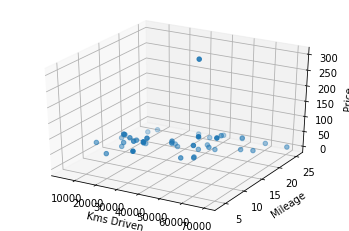

In [128]:
#3d plotting of Kms Driven and Mileage wrt Price
fig = plt.figure()
ax1 = fig.add_subplot(111 , projection = '3d')

x = x_test
y = y_test
z = z_test

ax1.scatter (x,y,z)
  
ax1.set_xlabel ('Kms Driven')
ax1.set_ylabel ('Mileage')
ax1.set_zlabel ('Price')
  
plt.show()

Case 2 : Year and Buyers

In [129]:
#Assigning the predictor variable and target variable 
x = df[['Year']]
y = df[['Buyers']]
z = df[['Price (Lakhs)']]


In [130]:
#splitting the dataset into test and train set
x_train, x_test, z_train, z_test = train_test_split(x, z, test_size = 0.3, random_state=2)
y_train, y_test, z_train, z_test = train_test_split(y, z, test_size = 0.3, random_state=2)

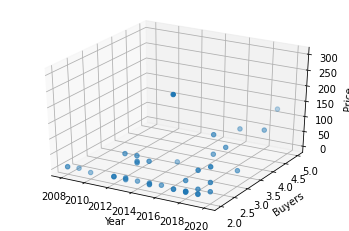

In [131]:
#3d plotting of Year and Buyers wrt Price
fig = plt.figure()
ax1 = fig.add_subplot(111 , projection = '3d')

x = x_test
y = y_test
z = z_test

ax1.scatter (x,y,z)
  
ax1.set_xlabel ('Year')
ax1.set_ylabel ('Buyers')
ax1.set_zlabel ('Price')
  
plt.show()

Case 3 : Horsepower and Engine 

In [132]:
#Assigning the predictor variable and target variable 
x = df[['Horsepower (kw)']]
y = df[['Engine']]
z = df[['Price (Lakhs)']]


In [133]:
#splitting the dataset into test and train set
x_train, x_test, z_train, z_test = train_test_split(x, z, test_size = 0.3, random_state=2)
y_train, y_test, z_train, z_test = train_test_split(y, z, test_size = 0.3, random_state=2)

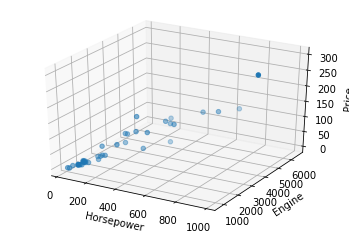

In [134]:
#3d plotting of Horsepower and Engine wrt Price
fig = plt.figure()
ax1 = fig.add_subplot(111 , projection = '3d')

x = x_test
y = y_test
z = z_test

ax1.scatter (x,y,z)
  
ax1.set_xlabel ('Horsepower')
ax1.set_ylabel ('Engine')
ax1.set_zlabel ('Price')
  
plt.show()

##As we can see that the case3 plotting shows linear trend , we will now perform multivariate linear regression and decision tree and then compare the two results.

Case 1 : Multivariate Linear Regression

In [135]:
#Assigning the predictor variable and target variable 
x = df[['Horsepower (kw)' , 'Engine']]
y = df[['Price (Lakhs)']]

In [136]:
#splitting the dataset into test and train set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=2)

In [137]:
#Using the linear regression function the predict the value
clf = LinearRegression()
clf.fit(x_train , y_train)
clf.score(x_test , y_test)

0.35592119049116866

In [138]:
regr = linear_model.LinearRegression()
regr.fit(x_test, y_test)

LinearRegression()

In [139]:
print (x_test , y_test)

     Horsepower (kw)  Engine
138              626    5204
104               72    1499
98                82    1498
41                74    1197
3                 73    1462
24                65    1493
48                45     799
127              205    2993
2                 46     998
5                 61    1197
71                74    1197
124              327    2998
86               147    1997
23                65    1493
94               358    2981
55               454    3855
45                62    1197
12                72    1497
59               985    3990
87               147    1997
122              376    4395
139              522    5204
110              383    3996
126              205    2993
117              290    2894
128              166    1998
25                95    2179
44                62    1197
141              651    6496
88               322    5000
65               286    2995
14                62    1199
11                72    1497
28            

In [140]:
#Predicted Price from test dataset w.r.t Linear Regression
y_predict_lr = regr.predict((x_test))


print (y_predict_lr)


#Model Evaluation using R-Square for Linear Regression
from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict_lr)
print('R-Square Error associated with Linear Regression is:', r_square)

[[146.31977924]
 [  7.11264966]
 [ 10.51493323]
 [ 11.74814226]
 [  7.93644603]
 [  4.81885349]
 [  7.13524385]
 [ 32.61011992]
 [  4.86630175]
 [  7.34220989]
 [ 11.74814226]
 [ 73.8925765 ]
 [ 26.0052879 ]
 [  4.81885349]
 [ 84.62181262]
 [105.7043124 ]
 [  7.68112777]
 [  7.13885931]
 [283.90055256]
 [ 26.0052879 ]
 [ 72.19211322]
 [111.07232029]
 [ 79.79336312]
 [ 32.61011992]
 [ 62.71551684]
 [ 32.4316227 ]
 [  5.99648046]
 [  7.68112777]
 [137.86129349]
 [ 45.96212947]
 [ 60.03625811]
 [  7.65491812]
 [  7.13885931]
 [ 11.96595396]
 [  2.76862596]
 [ 37.68078321]
 [ 17.30639555]
 [ 60.91382898]
 [ 18.4085567 ]
 [ 10.51493323]
 [ 72.19211322]
 [ 16.46678286]
 [  4.41441149]]
R-Square Error associated with Linear Regression is: 0.8684308205411453


Case 2 : Multivariate Decision Tree

In [141]:
#Assigning the predictor variable and target variable 
x = df[['Horsepower (kw)' , 'Engine']]
y = df[['Price (Lakhs)']]

In [142]:
#splitting the dataset into test and train set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=2)

In [143]:
#Import the Decision Tree Regressor 
from sklearn.tree import DecisionTreeRegressor  
  
#Create a decision tree regressor object  from DecisionTreeRegressor class
DtReg = DecisionTreeRegressor(random_state = 0)  
  
#Fit the decision tree regressor with training data represented by x_train and y_train
DtReg.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [144]:
print ( x_train , y_train)

     Horsepower (kw)  Engine
103               72    1499
118              220    2994
142              800    6500
74                74    1197
6                 60    1200
..               ...     ...
75                74    1197
43                47    1086
22               105    2184
72               146    2199
15                62    1199

[98 rows x 2 columns]      Price (Lakhs)
103           4.17
118          50.00
142         115.00
74            4.72
6             2.50
..             ...
75            7.80
43            2.33
22            8.24
72            7.83
15            3.80

[98 rows x 1 columns]


In [145]:
print ( x_test , y_test)

     Horsepower (kw)  Engine
138              626    5204
104               72    1499
98                82    1498
41                74    1197
3                 73    1462
24                65    1493
48                45     799
127              205    2993
2                 46     998
5                 61    1197
71                74    1197
124              327    2998
86               147    1997
23                65    1493
94               358    2981
55               454    3855
45                62    1197
12                72    1497
59               985    3990
87               147    1997
122              376    4395
139              522    5204
110              383    3996
126              205    2993
117              290    2894
128              166    1998
25                95    2179
44                62    1197
141              651    6496
88               322    5000
65               286    2995
14                62    1199
11                72    1497
28            

In [146]:
#Predicted Price from test dataset w.r.t Decision Tree Regression
y_predict_dtr = DtReg.predict((x_test))


print (y_predict_dtr)


#Model Evaluation using R-Square for Decision Tree Regression
from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict_dtr)
print('R-Square Error associated with Decision Tree Regression is:', r_square)

[200.           4.17         6.45         5.74666667   4.
   4.5          1.89        49.01         3.           2.3
   5.74666667  50.6         30.           4.5         80.
 106.           3.335        4.         350.          30.
 100.         200.          76.          49.01        38.
  40.33         6.54         3.335      190.          45.
  90.           3.335        4.           3.32         1.89
  50.           5.93        38.           8.68333333   6.45
 100.           3.8          4.5       ]
R-Square Error associated with Decision Tree Regression is: 0.7107876888797969


##Comparing the predicted price of Linear Regression and Decision Tree

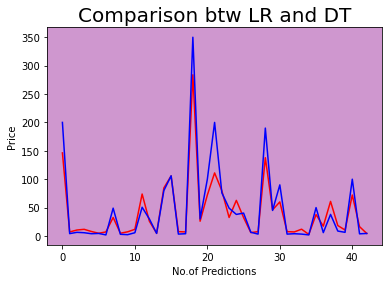

In [147]:
#Plotting a graph to compare the predicted prices  
  
ax = plt.axes()  
ax.set_facecolor("#cf97cf")  
  
plt.plot (y_predict_lr, color = 'r')
plt.plot (y_predict_dtr, color = 'b')

plt.xlabel('No.of Predictions')
plt.ylabel('Price')
plt.title('Comparison btw LR and DT', fontsize = 20)
  
plt.show()

###Conclusion : After the analysis we can conclude that the features " engine" and "horsepower" are the most important variables that play a key role in affecting the car price. The predicted price using LR and DT are somewhat similar. Our model using these variables are 70-80% accurate and can be used in real life for business analytics.  